<a href="https://colab.research.google.com/github/mahakanakala/datathon/blob/main/Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4485,Male,31.0,0,0,No,Private,Urban,215.07,32.7,smokes,0
4486,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4487,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4488,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4490 entries, 0 to 4489
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4490 non-null   object 
 1   age                4490 non-null   float64
 2   hypertension       4490 non-null   int64  
 3   heart_disease      4490 non-null   int64  
 4   ever_married       4490 non-null   object 
 5   work_type          4490 non-null   object 
 6   Residence_type     4490 non-null   object 
 7   avg_glucose_level  4490 non-null   float64
 8   bmi                4490 non-null   float64
 9   smoking_status     4490 non-null   object 
 10  stroke             4490 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 386.0+ KB


In [5]:
df.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of       gender    age  hypertension  heart_disease  ever_married  work_type  \
0      False  False         False          False         False      False   
1      False  False         False          False         False      False   
2      False  False         False          False         False      False   
3      False  False         False          False         False      False   
4      False  False         False          False         False      False   
...      ...    ...           ...            ...           ...        ...   
4485   False  False         False          False         False      False   
4486   False  False         False          False         False      False   
4487   False  False         False          False         False      False   
4488   False  False         False          False         False      False   
4489   False  False         False          False         False      False   

      Residen

In [6]:
print("Gender:", df.gender.unique())
print("Age:", df.age.unique())
print("Hypertension:", df.hypertension.unique())
print("Heart disease:", df.heart_disease.unique())
print("Ever married:", df.ever_married.unique())
print("Work type:", df.work_type.unique())
print("Residence type:", df.Residence_type.unique())
print("Glucose level:", df.avg_glucose_level.unique())
print("BMI:", df.bmi.unique())
print("Smoking status:", df.smoking_status.unique())
print("Stroke:", df.stroke.unique())

Gender: ['Male' 'Female']
Age: [6.70e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 6.90e+01 7.80e+01 6.10e+01
 5.40e+01 5.00e+01 6.40e+01 7.50e+01 7.10e+01 5.20e+01 8.20e+01 6.50e+01
 5.70e+01 4.20e+01 4.80e+01 7.40e+01 7.20e+01 5.80e+01 6.00e+01 7.60e+01
 3.90e+01 7.70e+01 6.30e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01 6.60e+01
 4.30e+01 5.90e+01 4.70e+01 5.30e+01 6.80e+01 3.80e+01 5.50e+01 4.60e+01
 3.20e+01 5.10e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01 2.00e+01 4.40e+01
 2.50e+01 2.70e+01 1.70e+01 1.30e+01 4.00e+00 1.60e+01 2.20e+01 3.00e+01
 1.10e+01 2.10e+01 1.80e+01 3.30e+01 2.40e+01 2.30e+01 3.60e+01 2.90e+01
 6.40e-01 3.40e+01 4.10e+01 5.00e+00 3.10e+01 7.00e+00 1.20e+01 6.20e+01
 2.00e+00 2.60e+01 9.00e+00 3.50e+01 1.40e+01 1.50e+01 2.80e+01 1.00e+01
 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00 1.00e+00 1.40e+00
 8.80e-01 2.40e-01 1.64e+00 1.56e+00 1.72e+00 7.20e-01 1.88e+00 1.24e+00
 8.00e-01 4.00e-01 1.48e+00 5.60e-01 1.32e+00 8.00e-02 1.60e-01 4.80e-01]
Hypertension: [0 1]

In [7]:
print(df.gender.value_counts())
print(df.hypertension.value_counts())
print(df.heart_disease.value_counts())
print(df.ever_married.value_counts())
print(df.work_type.value_counts())
print(df.Residence_type.value_counts())
print(df.smoking_status.value_counts())
print(df.stroke.value_counts())

Female    2613
Male      1877
Name: gender, dtype: int64
0    4048
1     442
Name: hypertension, dtype: int64
0    4241
1     249
Name: heart_disease, dtype: int64
Yes    2953
No     1537
Name: ever_married, dtype: int64
Private          2591
Self-employed     721
children          604
Govt_job          574
Name: work_type, dtype: int64
Urban    2273
Rural    2217
Name: Residence_type, dtype: int64
never smoked       1658
Unknown            1354
formerly smoked     775
smokes              703
Name: smoking_status, dtype: int64
0    4271
1     219
Name: stroke, dtype: int64


In [8]:
le = LabelEncoder()
df.gender = le.fit_transform(df.gender) #male = 1, female = 0
df.ever_married = le.fit_transform(df.ever_married) #yes = 1, no = 0
df.work_type = le.fit_transform(df.work_type) #government job = 0, private = 1, self_employed = 2, children = 3
df.Residence_type = le.fit_transform(df.Residence_type) #urban = 1, rural = 0
df.smoking_status = le.fit_transform(df.smoking_status) #unknown = 0, formerly smoked = 1, never smoked = 2, smokes = 3

In [9]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4485,1,31.0,0,0,0,1,1,215.07,32.7,3,0
4486,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4487,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4488,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [10]:
print(df.work_type.unique())
print(df.smoking_status.unique())

[1 2 0 3]
[1 2 3 0]


In [11]:
#df.avg_glucose_level.gt(200)
df.avg_glucose_level[df.avg_glucose_level > 220].count()
df.drop(df[df.avg_glucose_level > 220].index, inplace = True)
print(df.avg_glucose_level[df.avg_glucose_level > 220].count())

0


In [12]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4307.000000,4307.000000,4307.000000,4307.000000,4307.000000,4307.000000,4307.000000,4307.000000,4307.000000,4307.000000,4307.000000
mean,0.413977,42.518951,0.091711,0.049687,0.646390,1.309496,0.506385,100.621809,28.310959,1.368238,0.045275
std,0.492602,22.553590,0.288651,0.217322,0.478146,0.866152,0.500017,37.333717,6.752345,1.077142,0.207931
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,76.625000,23.500000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,1.000000,1.000000,90.660000,28.000000,2.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,2.000000,1.000000,110.940000,32.400000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,219.970000,48.900000,3.000000,1.000000


In [13]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:10]
y = df.iloc[:,10]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
gbc = GradientBoostingRegressor(n_estimators=100)
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)
er_gbc = mean_squared_error(y_test,y_pred)
r2_gbc = r2_score(y_test,y_pred)
ss_gbc = 1-r2_gbc
rmse_gbc = sqrt(er_gbc)
print('mean squared error: ',er_gbc)
print('r2 score: ', r2_gbc)
print('sum of square error: ', ss_gbc)
print('root mean square error: ', rmse_gbc)

mean squared error:  0.04269596488148488
r2 score:  0.006640884441590722
sum of square error:  0.9933591155584093
root mean square error:  0.20663001931346975


In [15]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

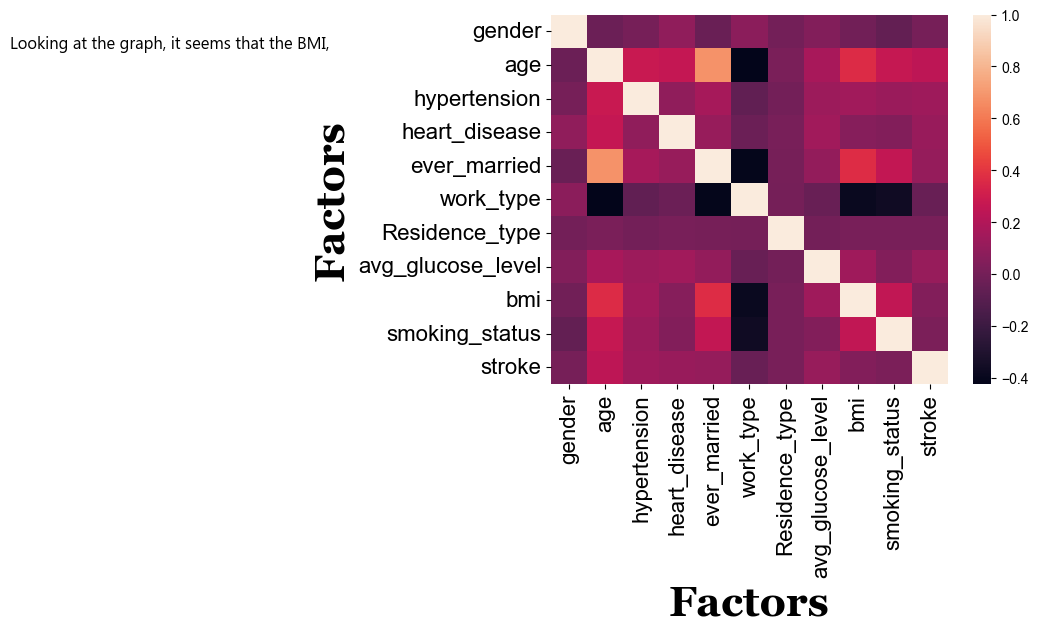

In [16]:
ax = sns.heatmap(df.corr()) #maybe can be used
#age, hypertension, heart disease, marriage, and blood glucose seem to be more correlated to the likeliness of a brain stroke compared to other factors

title_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '400',
    'size': 25
    
}
label_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': 'bold',
    'size': 30
}

opt_font = {
    'family': 'Gadugi',
    'color': 'black',
    'weight': '100',
    'size': 12
}


sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
#sns.set_style("darkgrid")
sns.set(font_scale=1.5)
ax.set_xlabel("Factors", fontdict= label_font)
ax.set_xticklabels(ax.get_xticklabels(), size = 16)

ax.set_ylabel("Factors", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=16)
plt.text(-15, 1, 'Looking at the graph, it seems that the BMI, ', fontdict = opt_font)
sns.set(rc={'figure.figsize':(8.27,8.27)})

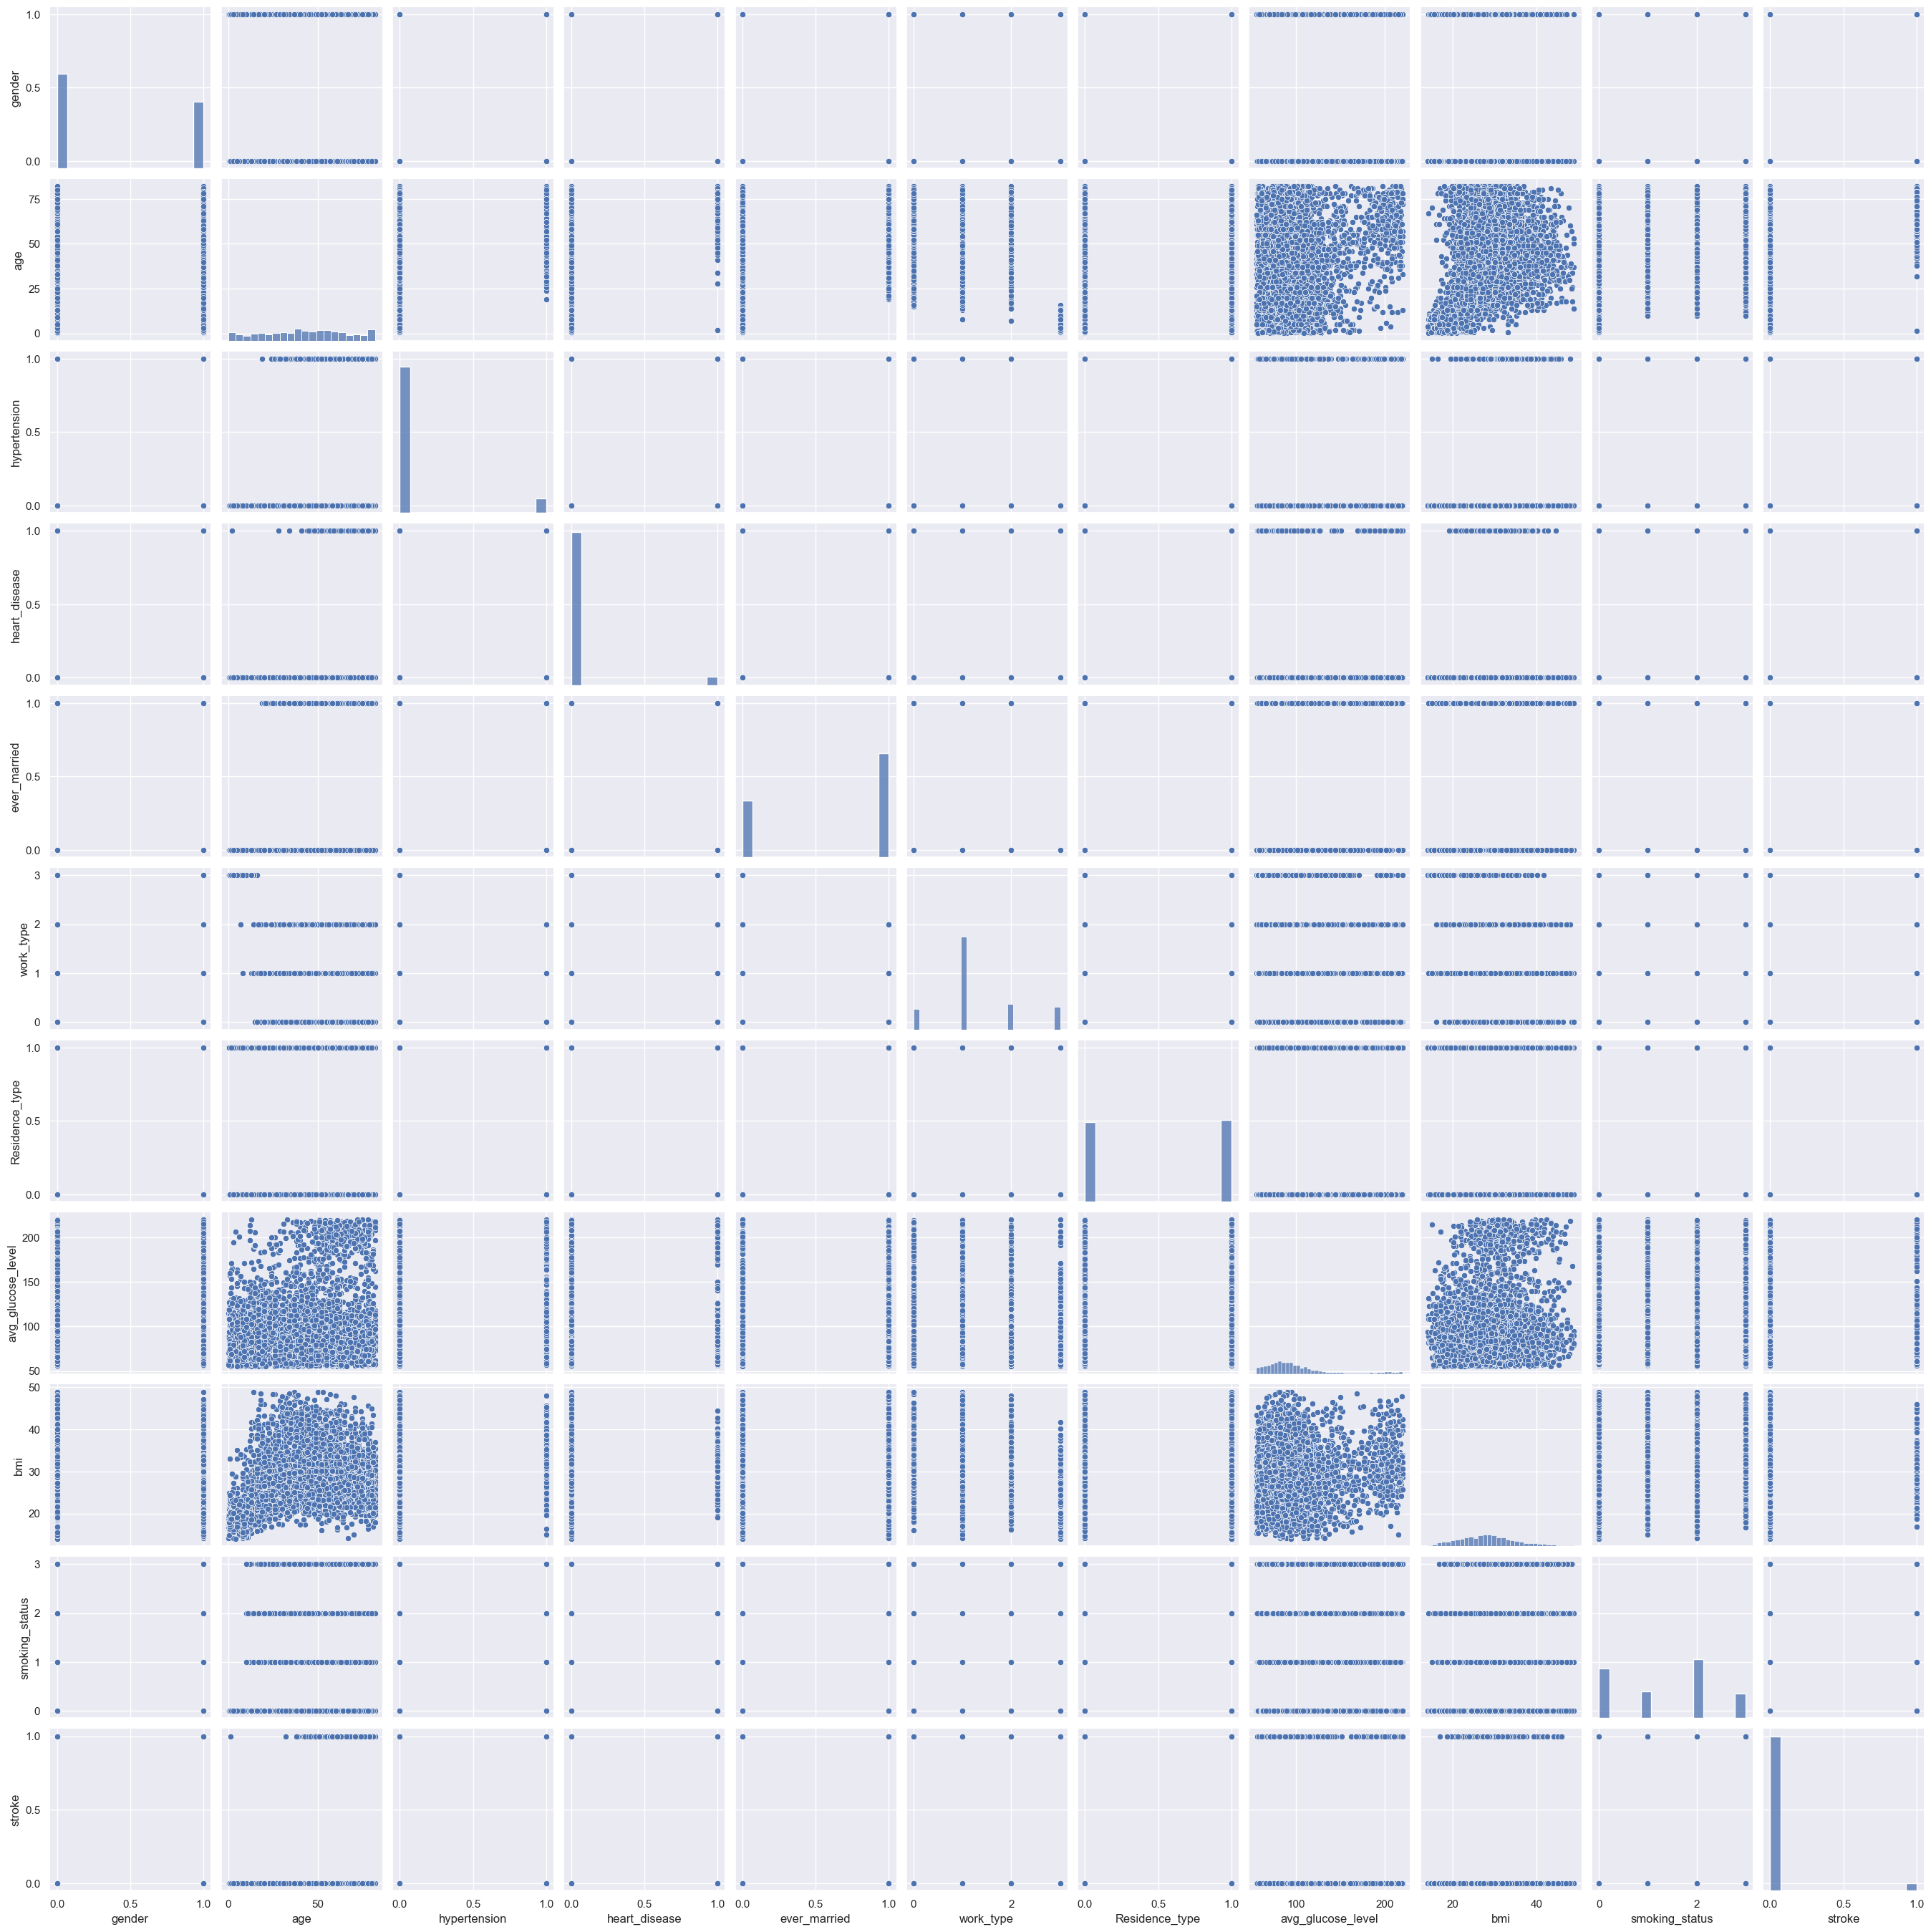

In [17]:
ax = sns.pairplot(df)

label_font = {
    'family': 'DejaVu Sans',
    'color': 'black',
    'weight': 'bold',
    'size': 50
}

sns.set(font_scale=1.5)





BMI vs. Stroke Likeliness
#Overweight. Potting where the BMI=24.9-29.9

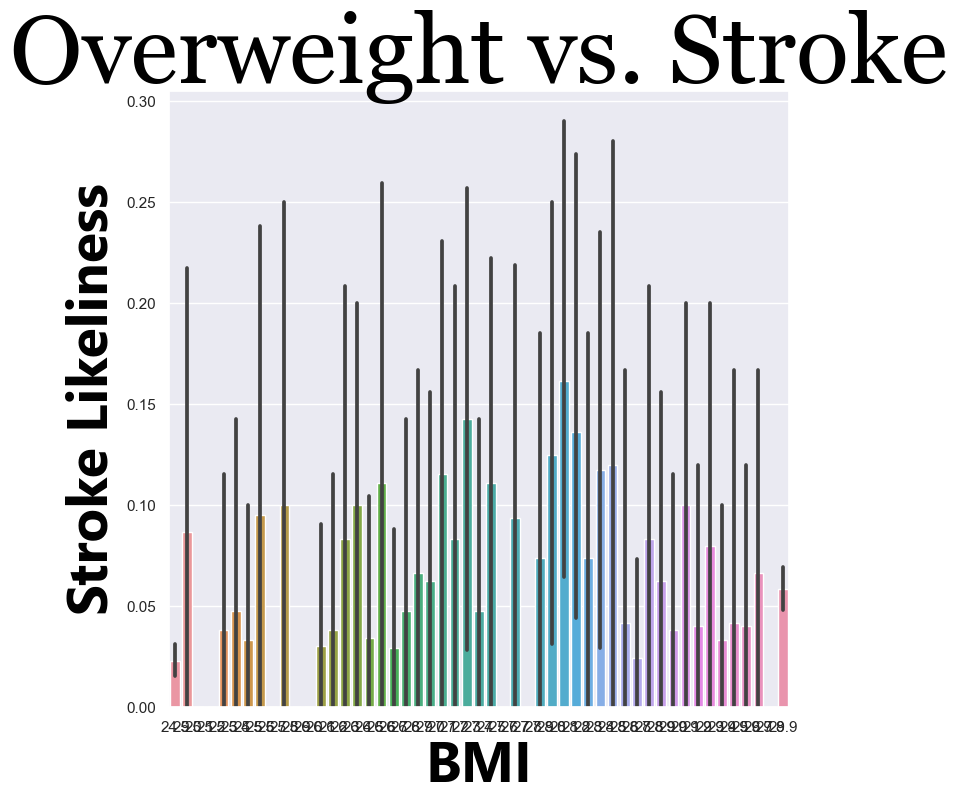

<Figure size 4000x1500 with 0 Axes>

In [78]:
df = pd.read_csv('train.csv')

overweight = np.clip(df['bmi'], 24.9, 29.9)
ax = sns.barplot(
    x=overweight, 
    y='stroke', 
    data = df)

sns.set_style("darkgrid")
sns.set(font_scale=1.5)

title_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '400',
    'size': 70
    
}
label_font = {
    'family': 'Segoe UI',
    'color': 'black',
    'weight': 'bold',
    'size': 40
}

opt_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '100',
    'size': 16
}

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
#sns.set_style("darkgrid")
sns.set(font_scale=1.5)
ax.set_xlabel("BMI", fontdict= label_font)

ax.set_ylabel("Stroke Likeliness", fontdict= label_font)

plt.figure(figsize=(40,15))
ax.set_title('Overweight vs. Stroke', fontdict=title_font)

plt.show()


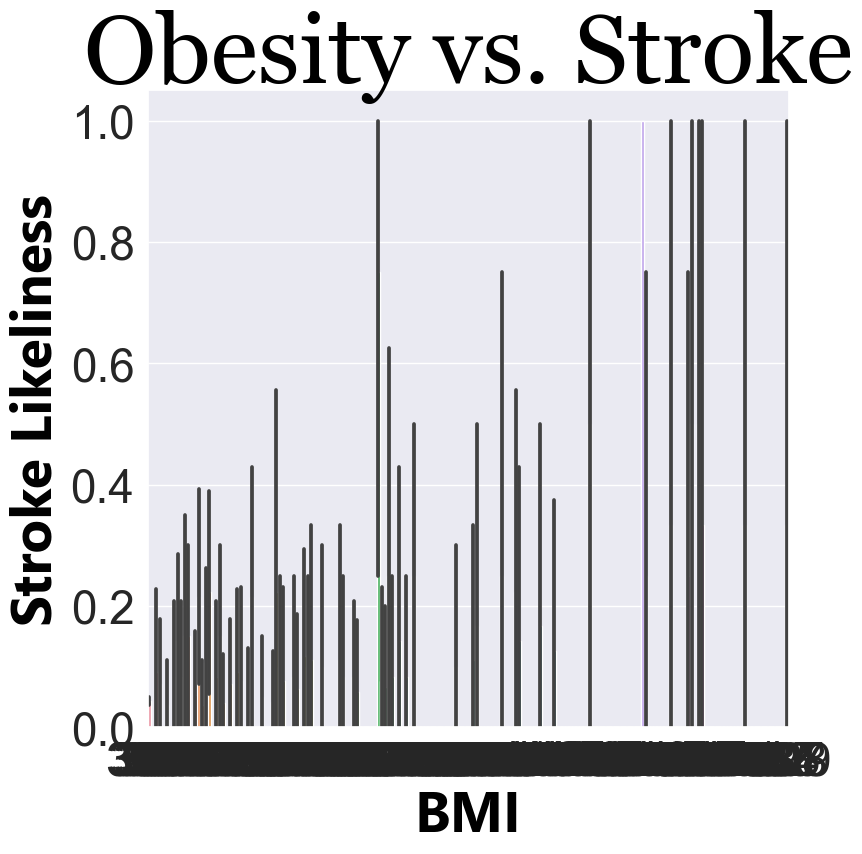

In [19]:
df = pd.read_csv('train.csv')

obese = np.clip(df['bmi'], 30, 48.9)
ax = sns.barplot(
    x=obese, 
    y='stroke', 
    data = df)

sns.set_style("darkgrid")
sns.set(font_scale=3)

title_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '400',
    'size': 70
    
}
label_font = {
    'family': 'Segoe UI',
    'color': 'black',
    'weight': 'bold',
    'size': 40
}

opt_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '100',
    'size': 16
}

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set(font_scale=1.5)
ax.set_xlabel("BMI", fontdict= label_font)

ax.set_ylabel("Stroke Likeliness", fontdict= label_font)


sns.set(rc = {'figure.figsize':(250,8)})
ax.set_title('Obesity vs. Stroke', fontdict=title_font)

plt.show()

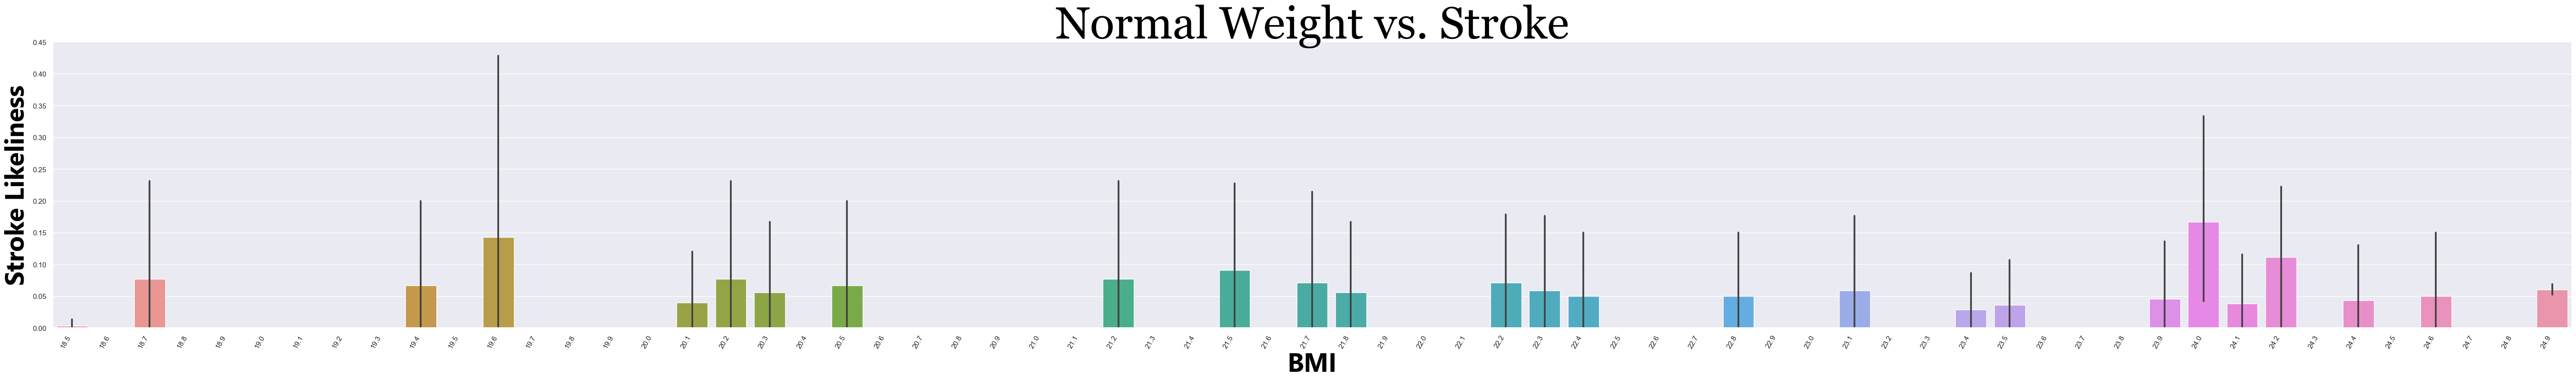

In [89]:
df = pd.read_csv('train.csv')

normal = np.clip(df['bmi'], 18.5, 24.9)
ax = sns.barplot(
    x=normal, 
    y='stroke', 
    data = df)

sns.set_style("darkgrid")
sns.set(font_scale=1.5)

title_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '400',
    'size': 70
    
}
label_font = {
    'family': 'Segoe UI',
    'color': 'black',
    'weight': 'bold',
    'size': 40
}

opt_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '100',
    'size': 16
}

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set(font_scale=1.5)
ax.set_xlabel("BMI", fontdict= label_font)

ax.set_ylabel("Stroke Likeliness", fontdict= label_font)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")

sns.set(rc = {'figure.figsize':(70,8)})
ax.set_title('Normal Weight vs. Stroke', fontdict=title_font)

plt.show()

In [21]:
#include p values and error 

Glucose Level vs. Stroke Likeliness

In [ ]:
glu = np.clip(df['avg_glucose_level'], 0 , 140)

ax = sns.barplot(
    x=glu,
    y='stroke',
    data = df
)


sns.set_style("darkgrid")
sns.set(font_scale=1.5)


title_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '400',
    'size': 70
    
}
label_font = {
    'family': 'Segoe UI',
    'color': 'black',
    'weight': 'bold',
    'size': 40
}

opt_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '100',
    'size': 16
}

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set(font_scale=1.5)
ax.set_xlabel("BMI", fontdict= label_font)

ax.set_ylabel("Stroke Likeliness", fontdict= label_font)

ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
sns.set(rc = {'figure.figsize':(120,10)})
ax.set_title('Non-Diabetic vs. Stroke', fontdict=title_font)

plt.show()

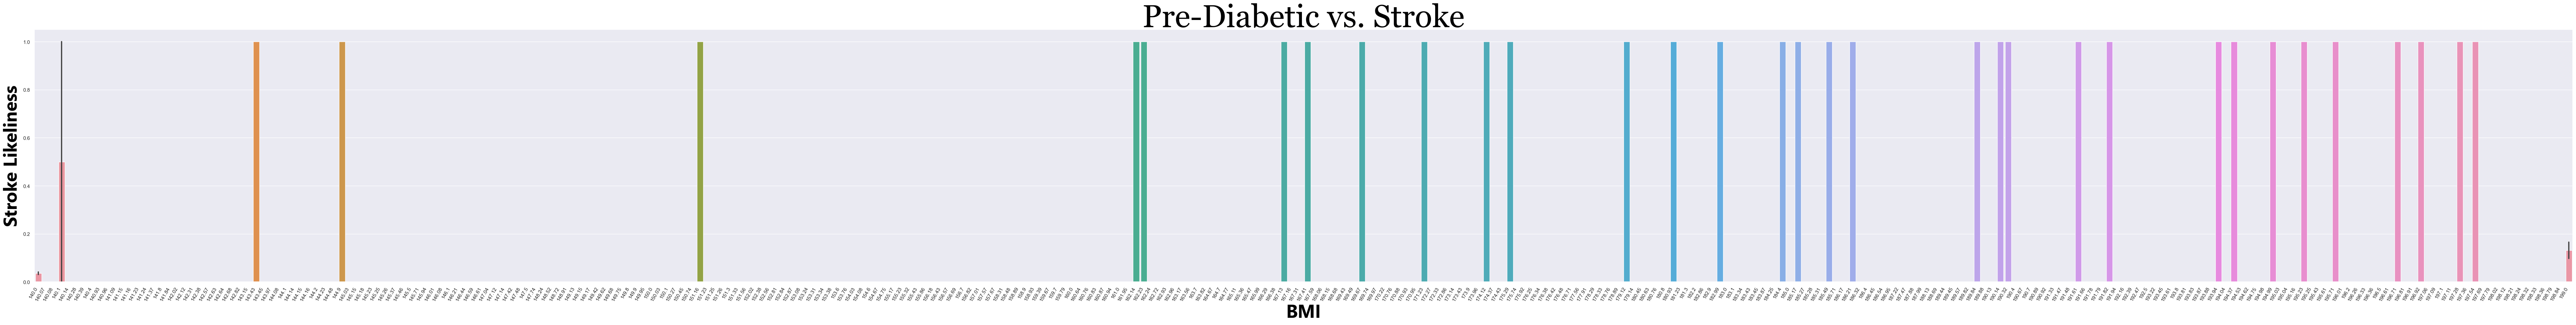

In [92]:
pre_glu = np.clip(df['avg_glucose_level'], 140 , 199)

ax = sns.barplot(
    x=pre_glu,
    y='stroke',
    data = df
)


sns.set_style("darkgrid")
sns.set(font_scale=1.5)


title_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '400',
    'size': 70
    
}
label_font = {
    'family': 'Segoe UI',
    'color': 'black',
    'weight': 'bold',
    'size': 40
}

opt_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '100',
    'size': 16
}

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set(font_scale=1.5)
ax.set_xlabel("BMI", fontdict= label_font)

ax.set_ylabel("Stroke Likeliness", fontdict= label_font)

ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
sns.set(rc = {'figure.figsize':(120,10)})
ax.set_title('Pre-Diabetic vs. Stroke', fontdict=title_font)

plt.show()

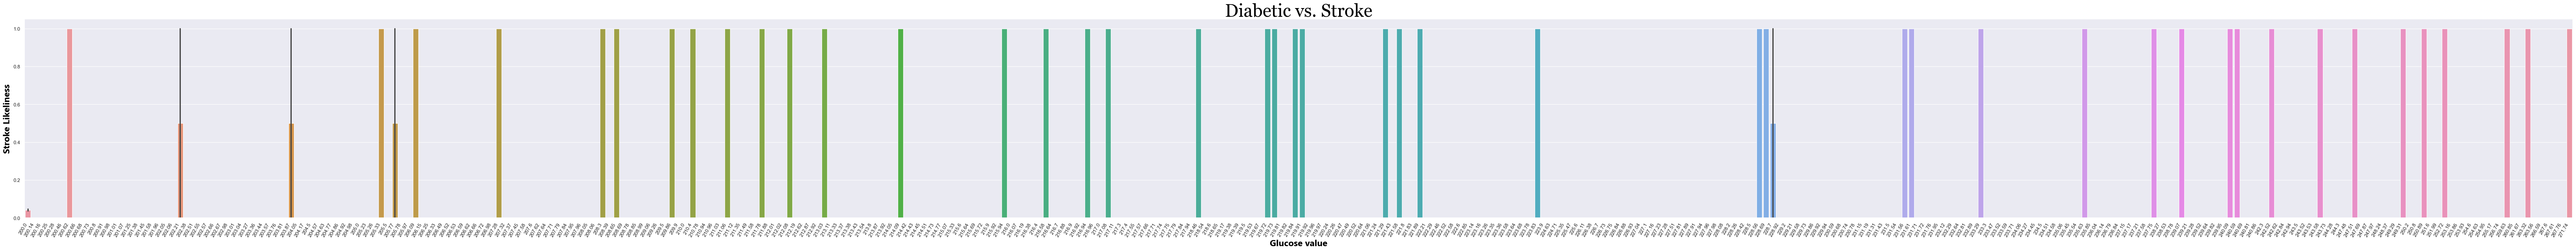

In [95]:
dia_glu = np.clip(df['avg_glucose_level'], 200 , 271.740000)

ax = sns.barplot(
    x=dia_glu,
    y='stroke',
    data = df
)


sns.set_style("darkgrid")

title_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '400',
    'size': 40
    
}
label_font = {
    'family': 'Segoe UI',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '100',
    'size': 16
}

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set(font_scale=1.5)
ax.set_xlabel("Glucose value", fontdict= label_font)

ax.set_ylabel("Stroke Likeliness", fontdict= label_font)

ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
sns.set(rc = {'figure.figsize':(102,8)})
ax.set_title('Diabetic vs. Stroke', fontdict=title_font)

plt.show()

Age vs. Stroke Likeliness

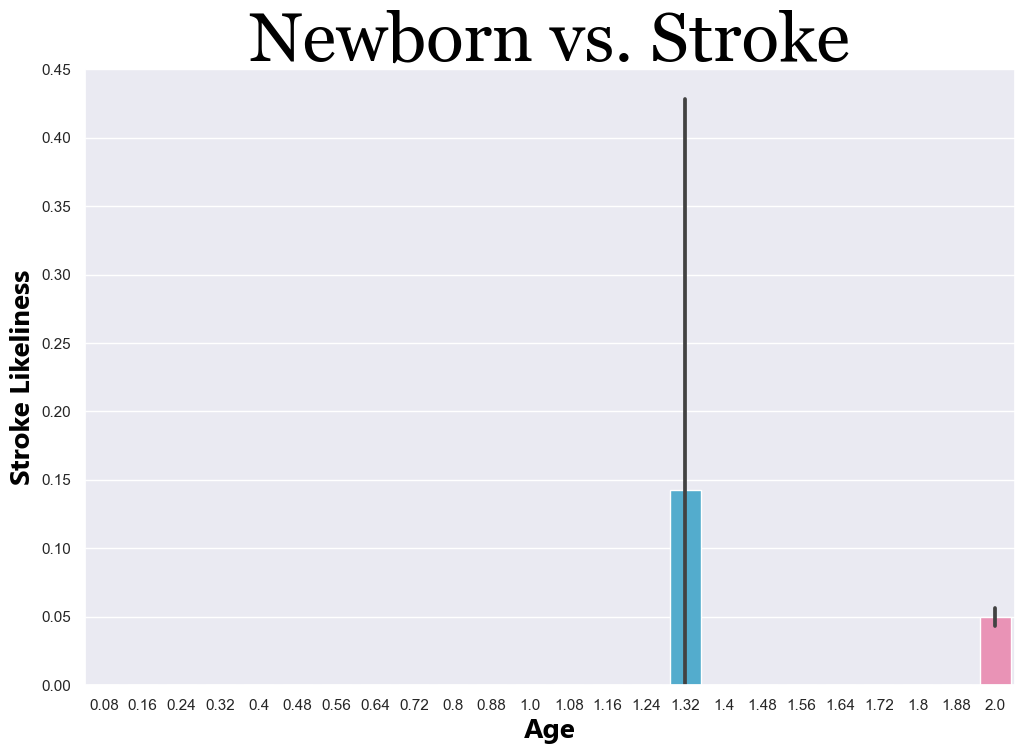

In [80]:


baby = np.clip(df['age'], 0, 2)

ax = sns.barplot(
    x=baby, 
    y='stroke', 
    data = df)


sns.set_style("darkgrid")
sns.set(font_scale=1.5)

title_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '400',
    'size': 40
    
}
label_font = {
    'family': 'Segoe UI',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '100',
    'size': 16
}

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set(font_scale=1.5)
ax.set_xlabel("Age", fontdict= label_font)

ax.set_ylabel("Stroke Likeliness", fontdict= label_font)


sns.set(rc = {'figure.figsize':(12,8)})
ax.set_title('Newborn vs. Stroke', fontdict=title_font)

plt.show()


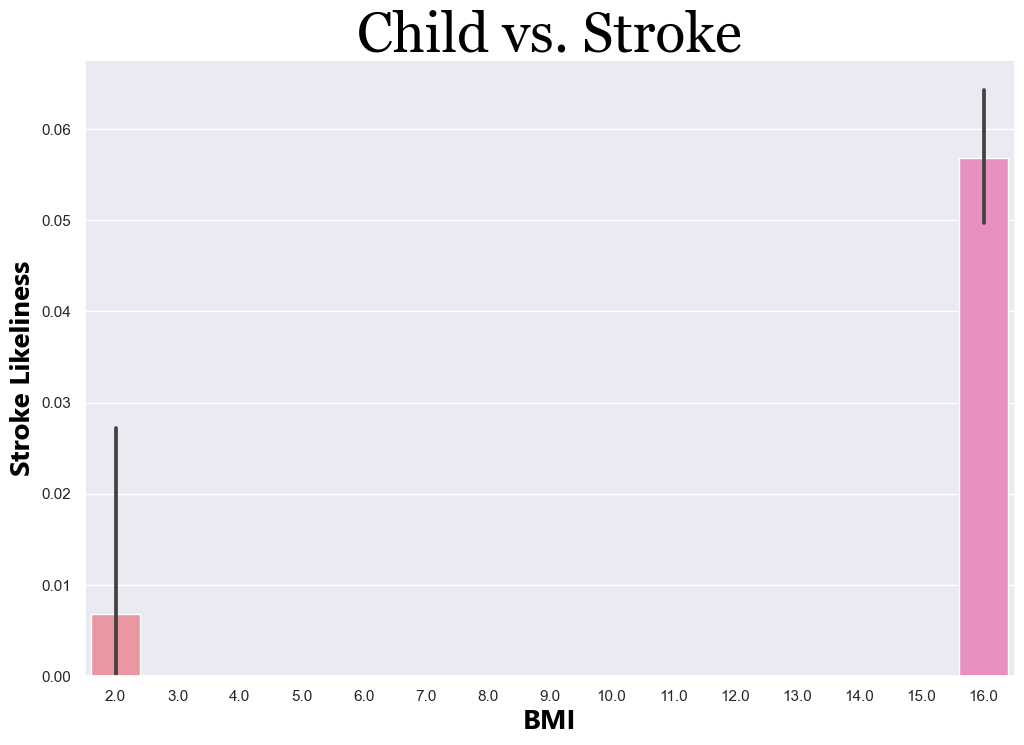

In [25]:
child = np.clip(df['age'], 2, 16)
ax = sns.barplot(
    x=child, 
    y='stroke', 
    data = df)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)

title_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '400',
    'size': 40
    
}
label_font = {
    'family': 'Segoe UI',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '100',
    'size': 16
}

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set(font_scale=3)
ax.set_xlabel("BMI", fontdict= label_font)

ax.set_ylabel("Stroke Likeliness", fontdict= label_font)


sns.set(rc = {'figure.figsize':(10,8)})
ax.set_title('Child vs. Stroke', fontdict=title_font)

plt.show()

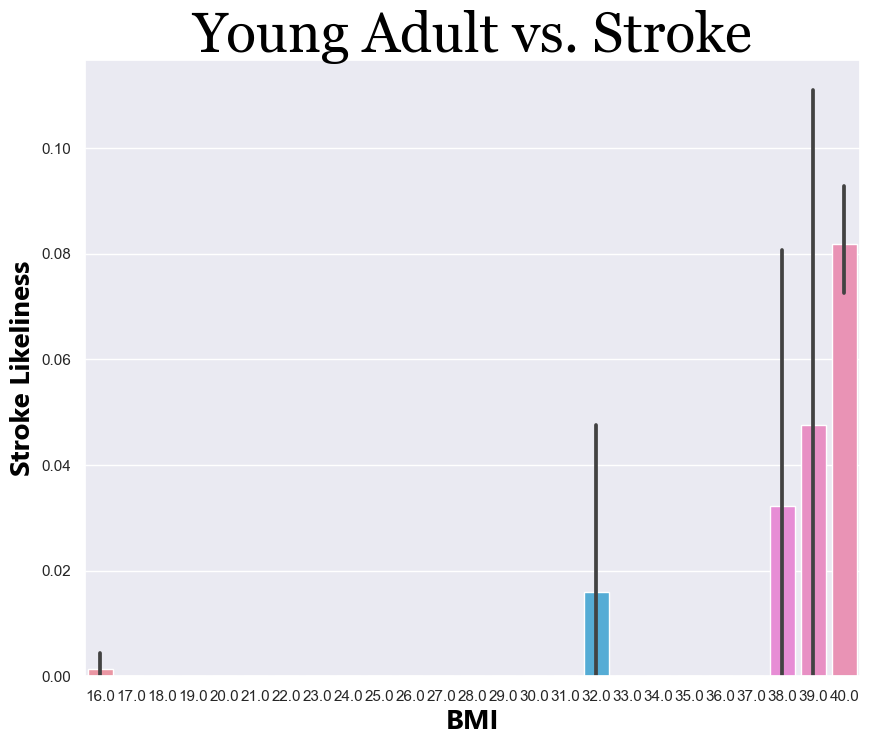

In [26]:
young_adult = np.clip(df['age'], 16, 40)
 
 
ax = sns.barplot(
    x=young_adult, 
    y='stroke', 
    data = df)

sns.set_style("darkgrid")
sns.set(font_scale=1.5)

title_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '400',
    'size': 40
    
}
label_font = {
    'family': 'Segoe UI',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '100',
    'size': 16
}

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set(font_scale=3)
ax.set_xlabel("BMI", fontdict= label_font)

ax.set_ylabel("Stroke Likeliness", fontdict= label_font)


sns.set(rc = {'figure.figsize':(15,8)})
ax.set_title('Young Adult vs. Stroke', fontdict=title_font)

plt.show()

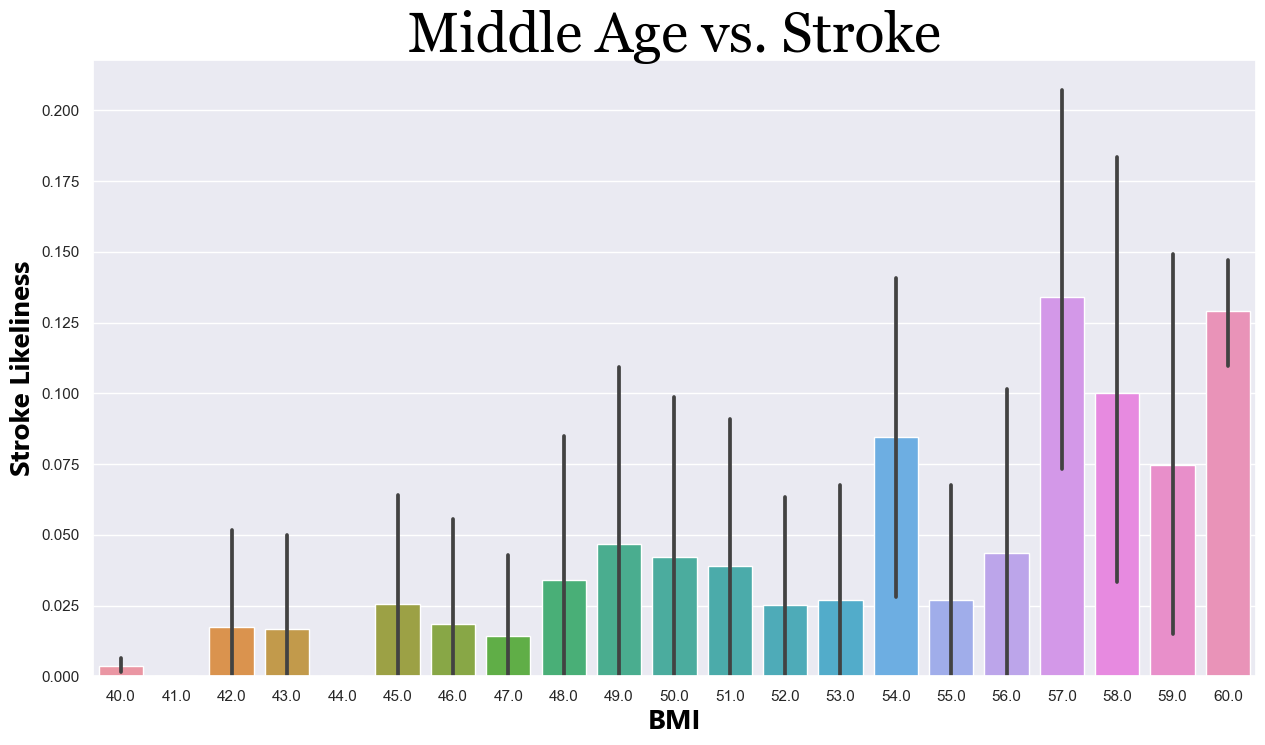

In [27]:
middle_age = np.clip(df['age'], 40, 60)


ax = sns.barplot(
    x=middle_age, 
    y='stroke', 
    data = df)


sns.set(font_scale=1.5)

title_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '400',
    'size': 40
    
}
label_font = {
    'family': 'Segoe UI',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '100',
    'size': 16
}

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set(font_scale=3)
ax.set_xlabel("BMI", fontdict= label_font)

ax.set_ylabel("Stroke Likeliness", fontdict= label_font)


sns.set(rc = {'figure.figsize':(10,8)})
ax.set_title('Middle Age vs. Stroke', fontdict=title_font)

plt.show()

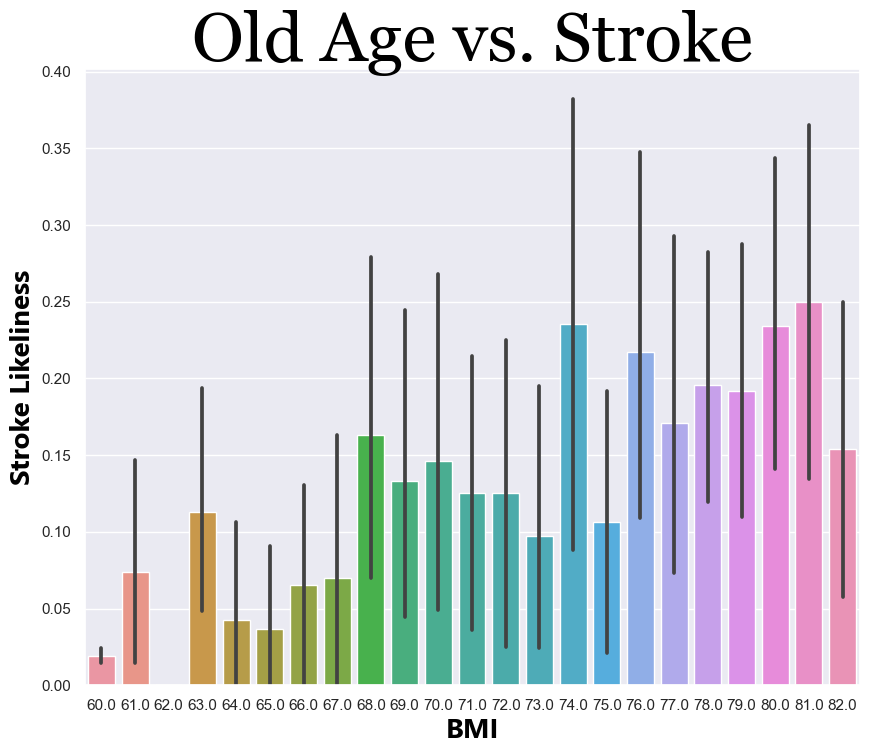

In [28]:
old_age = np.clip(df['age'], 60, 99)
ax = sns.barplot(
    x=old_age, 
    y='stroke', 
    data = df)

sns.set_style("darkgrid")
sns.set(font_scale=1.5)

title_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '400',
    'size': 50
    
}
label_font = {
    'family': 'Segoe UI',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '100',
    'size': 16
}

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set(font_scale=3)
ax.set_xlabel("BMI", fontdict= label_font)

ax.set_ylabel("Stroke Likeliness", fontdict= label_font)


sns.set(rc = {'figure.figsize':(10,8)})
ax.set_title('Old Age vs. Stroke', fontdict=title_font)

plt.show()

Text(36.0, 0.5, 'Stroke Likeliness')

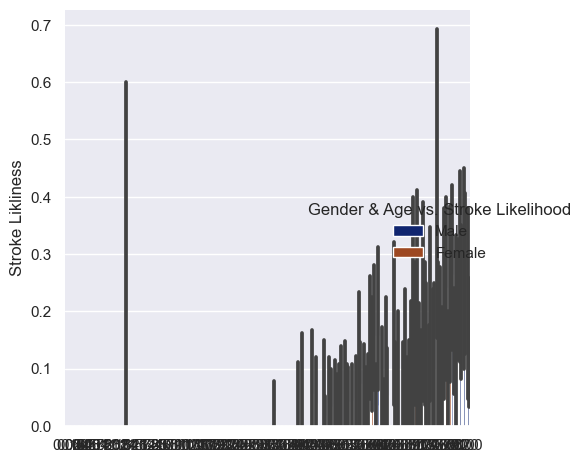

In [29]:
# Draw a nested barplot by age and sex
g = sns.catplot(
    data=df, kind="bar",
    x="age", y="stroke", hue="gender", palette="dark"
)

title_font = {
    'family': 'DejaVu Sans',
    'color': 'black',
    'weight': '400',
    'size': 25
    
}
label_font = {
    'family': 'DejaVu Sans',
    'color': 'black',
    'weight': 'bold',
    'size': 50
}

opt_font = {
    'family': 'DejaVu Sans',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale=1.5)

sns.set(rc={'figure.figsize':(220,82.7)})
g.despine(left=True)
g.set_axis_labels("", "Stroke Likliness")
g.legend.set_title("Gender & Age vs. Stroke Likelihood")

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
#sns.set_style("darkgrid")
sns.set(font_scale=1.5)
ax.set_xlabel("Age", fontdict= label_font)

ax.set_ylabel("Stroke Likeliness", fontdict= label_font)

In [30]:
never = df[df['smoking_status'].str.contains('never smoked')]
formerly = df[df['smoking_status'].str.contains('formerly smoked')]
smokes = df[df['smoking_status'].str.contains('smokes')]


occ  = [never, formerly, smokes]
types = ['never', 'formerly', 'smokes']

print(df[df['smoking_status']])

ax = sns.barplot(
    x= occ, 
    y=types, 
    data = df)

sns.set_style("darkgrid")
sns.set(font_scale=1.5)

title_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '400',
    'size': 50
    
}
label_font = {
    'family': 'Segoe UI',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '100',
    'size': 16
}

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set(font_scale=3)
ax.set_xlabel("BMI", fontdict= label_font)

ax.set_ylabel("Stroke Likeliness", fontdict= label_font)


sns.set(rc = {'figure.figsize':(10,8)})
ax.set_title('Old Age vs. Stroke', fontdict=title_font)

plt.show()

KeyError: "None of [Index(['formerly smoked', 'never smoked', 'smokes', 'never smoked',\n       'formerly smoked', 'never smoked', 'Unknown', 'never smoked', 'smokes',\n       'smokes',\n       ...\n       'Unknown', 'smokes', 'smokes', 'smokes', 'never smoked', 'smokes',\n       'formerly smoked', 'smokes', 'smokes', 'never smoked'],\n      dtype='object', length=4490)] are in the [columns]"

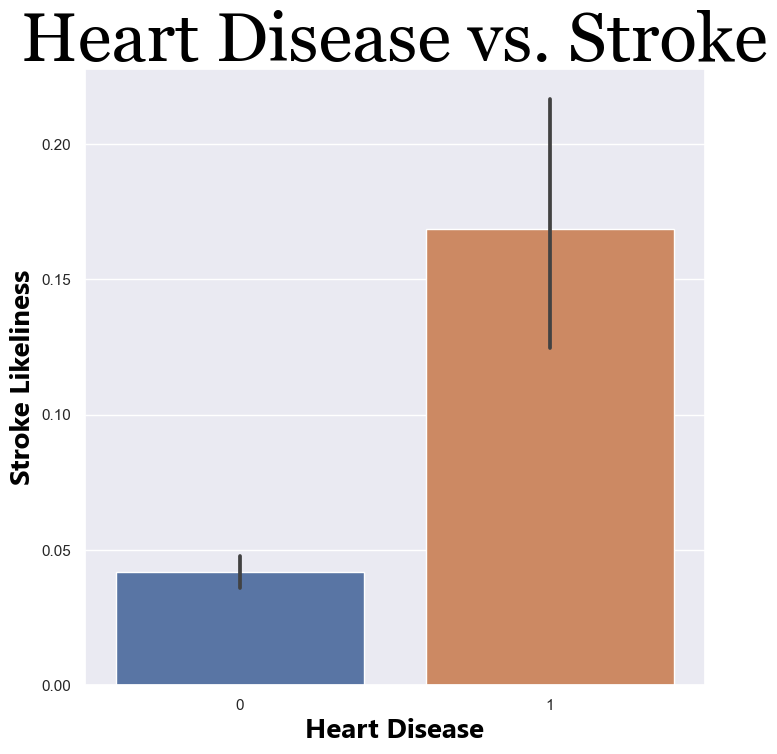

In [ ]:


ax = sns.barplot(
    x= 'heart_disease', 
    y='stroke', 
    data = df)

sns.set_style("darkgrid")
sns.set(font_scale=1.5)

title_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '400',
    'size': 50
    
}
label_font = {
    'family': 'Segoe UI',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '100',
    'size': 16
}
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set(font_scale=3)
ax.set_xlabel("Heart Disease", fontdict= label_font)

ax.set_ylabel("Stroke Likeliness", fontdict= label_font)


sns.set(rc = {'figure.figsize':(8,8)})
ax.set_title('Heart Disease vs. Stroke', fontdict=title_font)

plt.show()

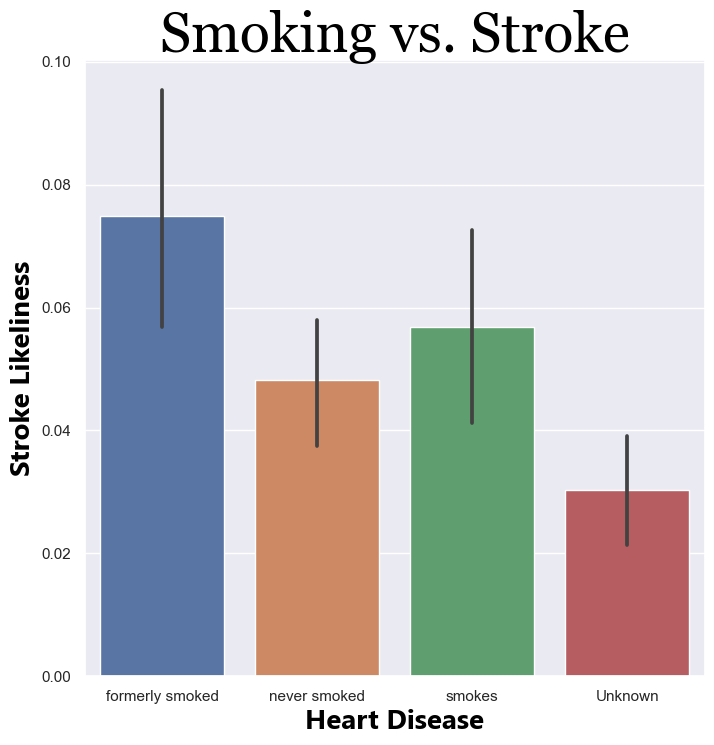

In [50]:
ax = sns.barplot(
    x= "smoking_status", 
    y='stroke', 
    data = df)

sns.set_style("darkgrid")
sns.set(font_scale=1.5)

title_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '400',
    'size': 40
    
}
label_font = {
    'family': 'Segoe UI',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '100',
    'size': 16
}

sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set(font_scale=1.5)
ax.set_xlabel("Had Heart Disease?", fontdict= label_font)

ax.set_ylabel("Stroke Likeliness", fontdict= label_font)


sns.set(rc = {'figure.figsize':(10,8)})
ax.set_title('Smoking vs. Stroke', fontdict=title_font)

plt.show()

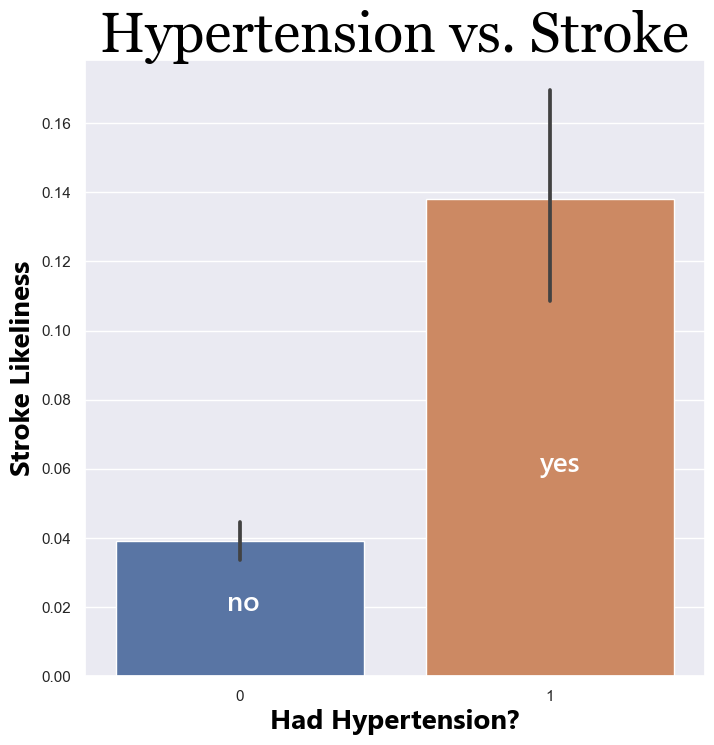

In [77]:
ax = sns.barplot(
    x= 'hypertension', 
    y='stroke', 
    data = df)

sns.set_style("darkgrid")
sns.set(font_scale=1.5)

title_font = {
    'family': 'Georgia',
    'color': 'black',
    'weight': '400',
    'size': 40
    
}
label_font = {
    'family': 'Segoe UI',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Segoe UI',
    'color': 'white',
    'weight': '600',
    'size': 20
}
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set(font_scale=1.5)
ax.set_xlabel("Had Hypertension?", fontdict= label_font)

ax.set_ylabel("Stroke Likeliness", fontdict= label_font)


sns.set(rc = {'figure.figsize':(8,8)})
ax.set_title('Hypertension vs. Stroke', fontdict=title_font)
plt.text(-0.04, .019, 'no', fontdict = opt_font)
plt.text(.97, .059, 'yes', fontdict = opt_font)
plt.show()